In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

#### 시도간전입

In [3]:
move_pop = pd.read_csv('./data/시도간전입(2015~2022).csv')

In [4]:
move_pop.rename(columns={'Unnamed: 0' : '구별'}, inplace=True)

In [5]:
move_pop.index = move_pop['구별']

In [6]:
move_pop.drop(columns=['구별'], inplace=True)

In [7]:
move_pop.drop(index='전국', inplace=True)

In [8]:
move_pop

,시도간전입(2015),시도간전입(2016),시도간전입(2017),시도간전입(2018),시도간전입(2019),시도간전입(2020),시도간전입(2021),시도간전입(2022)
구별,,,,,,,,
서울특별시,201336,204184,207382,217907,227470,242895,229610,225250
부산광역시,51269,48351,47927,45109,47638,53046,53324,49968
대구광역시,35679,34627,34203,34854,34007,39874,37501,37571
인천광역시,56154,54679,53067,54929,55632,56609,61409,60551
광주광역시,26570,25438,24591,26413,27045,28412,28433,24556
대전광역시,33869,34749,34434,34695,35829,38606,40119,38186
울산광역시,22666,19270,16824,16202,16956,17805,18515,17820
세종특별자치시,18337,15087,16930,17533,17123,15661,15947,14034
경기도,226364,227795,219003,231866,231366,255882,254269,216062


<Axes: ylabel='구별'>

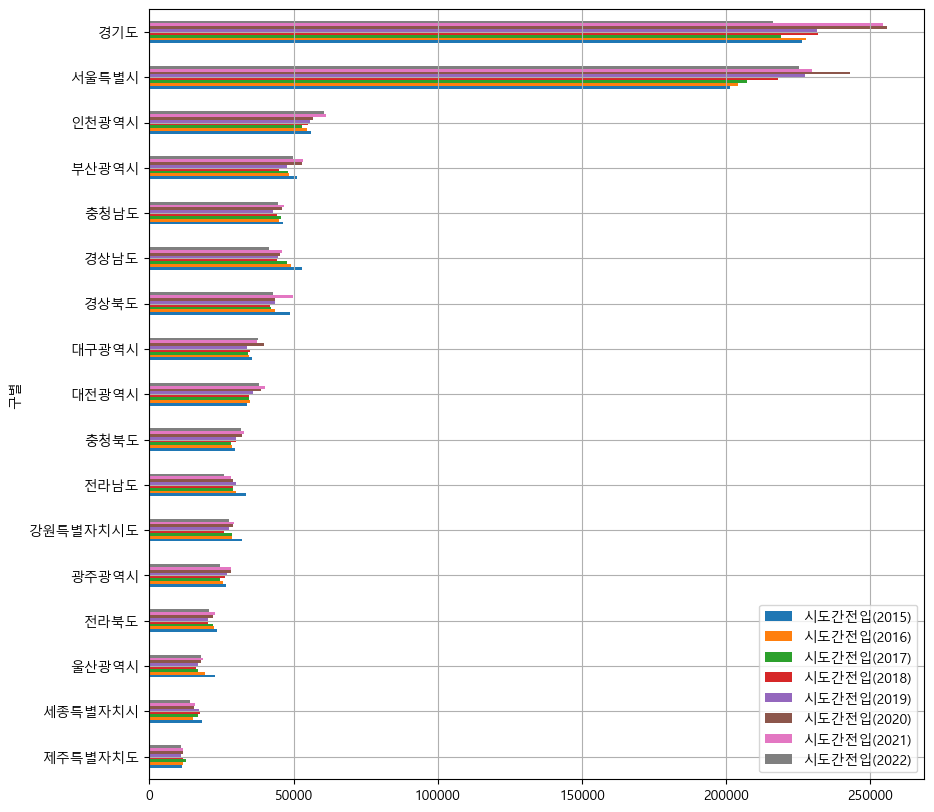

In [10]:
move_pop.sort_values(by=['시도간전입(2020)']).plot(kind='barh',grid=True, figsize=(10, 10))

In [11]:
move_pop_mean = move_pop
move_pop_mean['시도간전입(평균)'] = move_pop.mean(axis='columns')
move_pop_mean.sort_values(by=['시도간전입(평균)'],inplace=True)

In [12]:
test = move_pop_mean['시도간전입(평균)']

<Axes: ylabel='구별'>

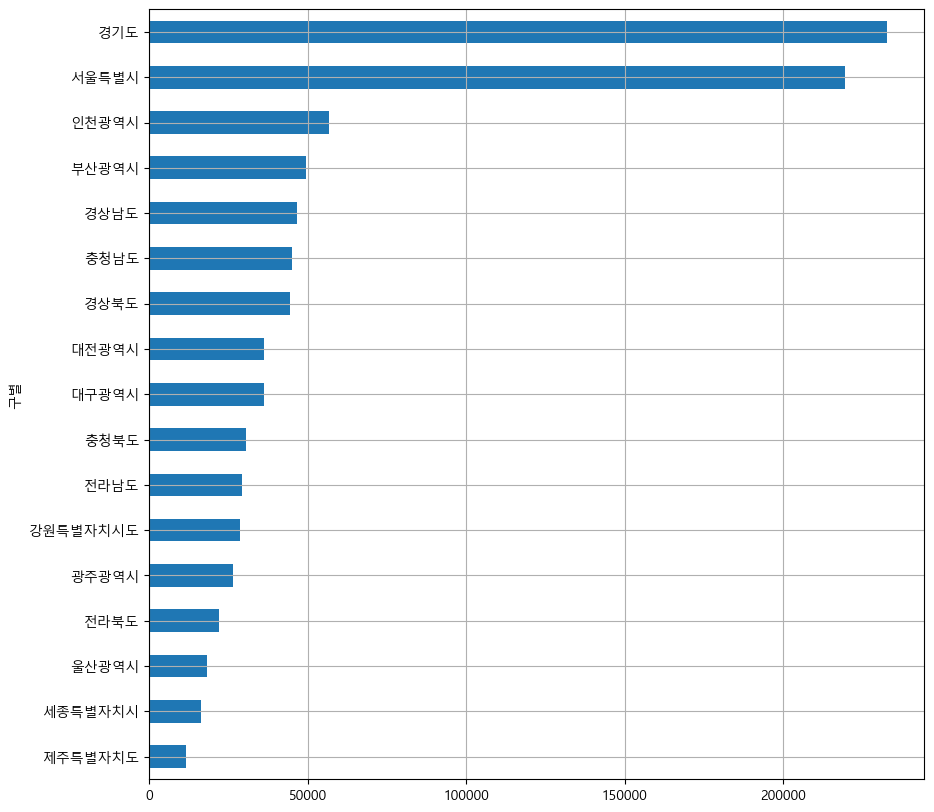

In [13]:
test.plot(kind='barh', grid=True, figsize=(10, 10))

#### 연도별 귀농인수 / 청년층 비율

In [14]:
farm_pop = pd.read_csv('./data/년도별_귀농인수.csv')
farm_pop

,시점,귀농인,전년대비증감수,전년대비증감률
0,2015,19860,1884,10.5
1,2016,20559,699,3.5
2,2017,19630,-929,-4.5
3,2018,17856,-1774,-9.0
4,2019,16181,-1675,-9.4
5,2020,17447,1266,7.8
6,2021,19776,2329,13.3
7,2022,16906,-2870,-14.5


<Axes: xlabel='시점'>

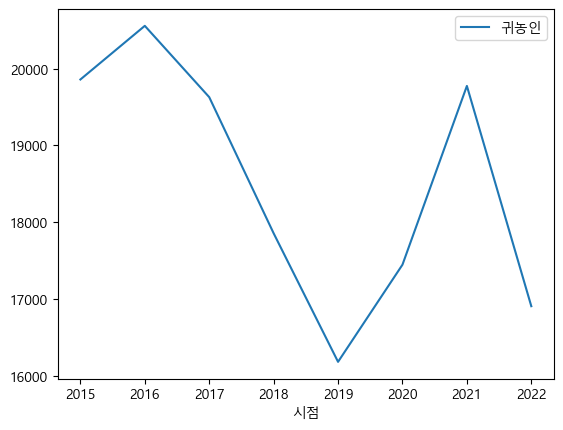

In [15]:
# 막대그래프와 같이 그리기
farm_pop.plot(x = '시점', y=['귀농인'])

<Axes: xlabel='시점'>

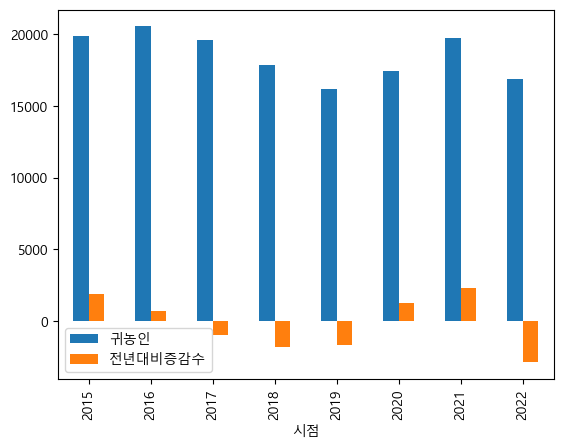

In [16]:
farm_pop.plot(kind='bar', x='시점', y=['귀농인', '전년대비증감수'])

In [17]:
youth_farm = pd.read_csv('./data/청년층귀농인.csv')
youth_farm

,시점,청년층귀농인,전년대비증감
0,2015,5108,231
1,2016,5307,199
2,2017,4788,-519
3,2018,4233,-555
4,2019,3413,-820
5,2020,3699,286
6,2021,3842,143
7,2022,3009,-833


<Axes: xlabel='시점'>

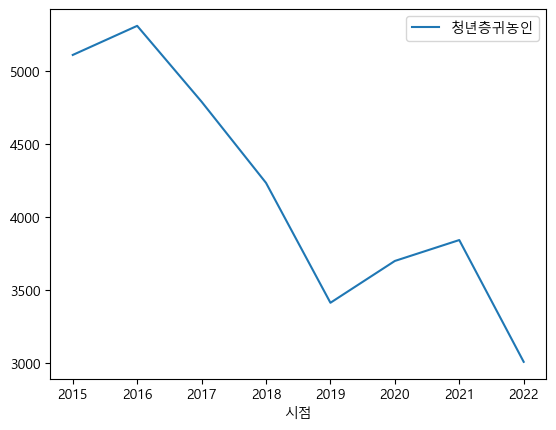

In [18]:
youth_farm.plot(x='시점', y='청년층귀농인')

In [19]:
farm_rate = youth_farm['청년층귀농인'] / farm_pop['귀농인']
farm_rate = pd.DataFrame(farm_rate)
farm_rate

,0
0,0.257200
1,0.258135
2,0.243912
3,0.237063
4,0.210926
5,0.212014
6,0.194276
7,0.177984


In [20]:
farm_rate.rename(columns={0:'청년귀농비율'})

,청년귀농비율
0,0.257200
1,0.258135
2,0.243912
3,0.237063
4,0.210926
5,0.212014
6,0.194276
7,0.177984


In [21]:
farm_rate.index = farm_pop['시점']
farm_rate.rename(columns={0:'청년귀농비율'}, inplace=True)

<Axes: xlabel='시점'>

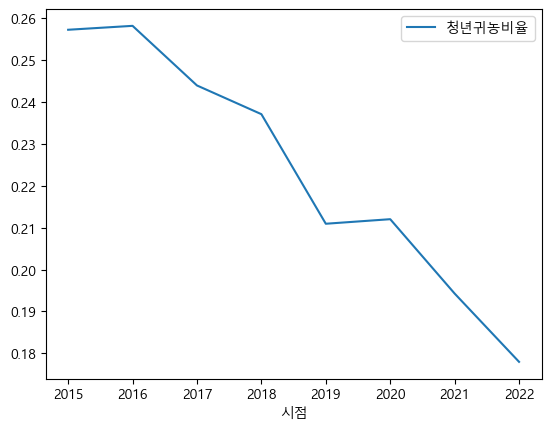

In [22]:
farm_rate.plot(y='청년귀농비율')

In [23]:
total_region_sum = pd.read_csv('./data/연도별_지역간_귀농인_합계.csv')
total_region_sum.rename(columns={'Unnamed: 0' : '구별'}, inplace=True)

In [24]:
test=total_region_sum[:4].sum()
test_2 = pd.DataFrame(test).loc['구별'] = '광역시'
test = pd.DataFrame(test)
total_farm_sum=pd.concat([total_region_sum, test.T], ignore_index=True)
total_farm_sum

,Unnamed: 0.1,구별,합계
0,0,부산광역시,108
1,1,대구광역시,402
2,2,인천광역시,245
3,3,울산광역시,221
4,4,세종특별자치시,216
5,5,경기도,4103
6,6,강원도,2336
7,7,충청북도,2108
8,8,충청남도,3397
9,9,전라북도,3946


In [25]:
total_farm_sum[5:]

,Unnamed: 0.1,구별,합계
5,5,경기도,4103
6,6,강원도,2336
7,7,충청북도,2108
8,8,충청남도,3397
9,9,전라북도,3946
10,10,전라남도,5559
11,11,경상북도,5501
12,12,경상남도,4087
13,13,제주특별자치도,1170
14,6,광역시,976


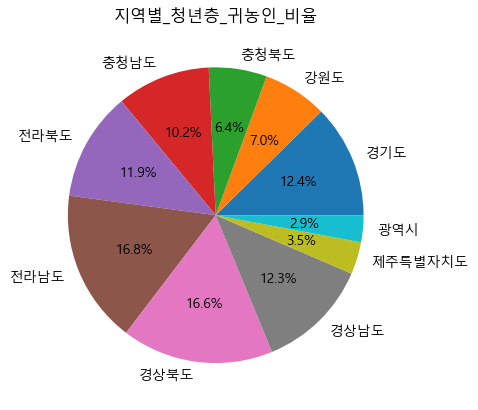

In [28]:
plt.pie(total_farm_sum[5:]['합계'], labels=total_farm_sum[5:]['구별'],
        autopct='%1.1f%%',)
plt.title('지역별_청년층_귀농인_비율')
plt.show()


#### 연도별 귀촌인수 / 청년층 비율

In [29]:
home_pop = pd.read_csv('./data/년도별_귀촌인수.csv')
home_pop

,시점,귀촌인,전년대비증감수,전년대비증감률
0,2015,466778,27243,6.2
1,2016,475489,8711,1.9
2,2017,497187,21698,4.6
3,2018,472474,-24713,-5.0
4,2019,444464,-28010,-5.9
5,2020,477122,32658,7.3
6,2021,495658,18536,3.9
7,2022,421106,-74552,-15.0


<Axes: xlabel='시점'>

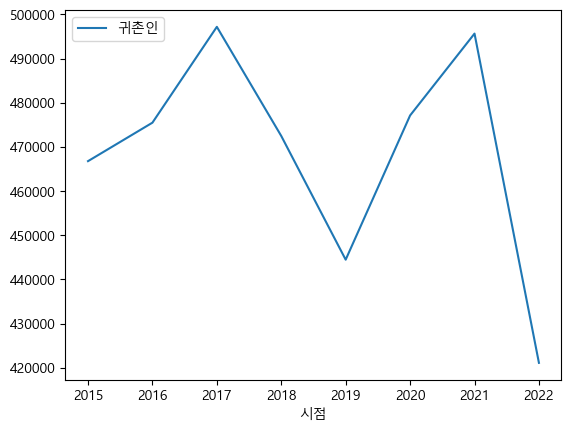

In [30]:
home_pop.plot(x = '시점', y = '귀촌인')

<Axes: xlabel='시점'>

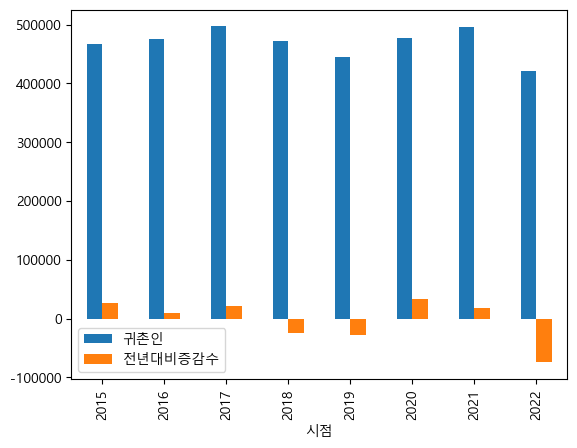

In [31]:
home_pop.plot(kind='bar', x='시점', y=['귀촌인', '전년대비증감수'])

In [32]:
youth_home = pd.read_csv('./data/청년층귀촌인.csv')

<Axes: xlabel='시점'>

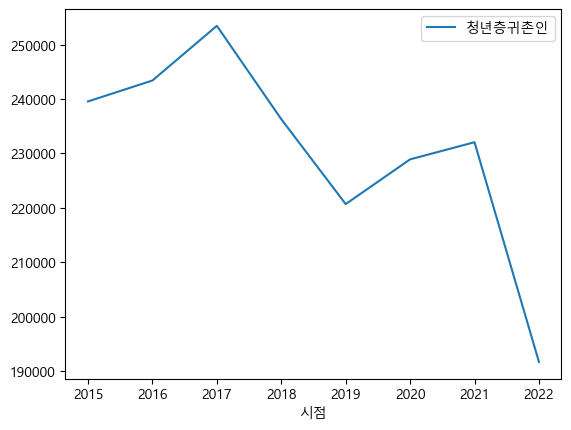

In [33]:
youth_home.plot(x='시점', y='청년층귀촌인')

In [34]:
home_rate = youth_home['청년층귀촌인'] / home_pop['귀촌인']
home_rate = pd.DataFrame(home_rate)

In [35]:
home_rate.index = home_pop['시점']

In [36]:
home_rate.rename(columns={0 : '청년귀촌비율'}, inplace=True)
home_rate

,청년귀촌비율
시점,
2015,0.513231
2016,0.511921
2017,0.509798
2018,0.500155
2019,0.496522
2020,0.479777
2021,0.468190
2022,0.455170


<Axes: xlabel='시점'>

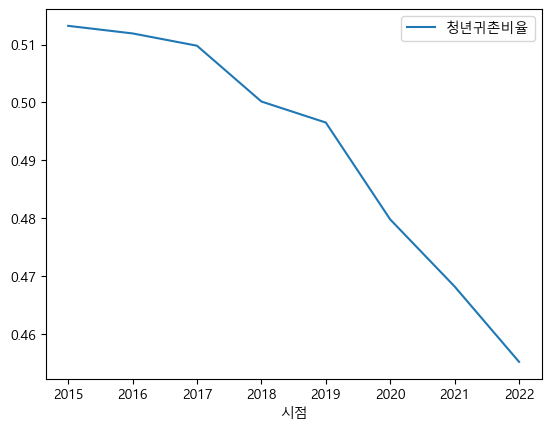

In [37]:
home_rate.plot(y = '청년귀촌비율')

In [38]:
total_region_home_sum = pd.read_csv('./data/연도별_지역간_귀촌인_합계.csv')
total_region_home_sum.rename(columns={'Unnamed: 0': '구별'}, inplace=True)

In [39]:
total_region_home_sum[:4].sum()

Unnamed: 0.1                       6
구별              부산광역시대구광역시인천광역시울산광역시
합계                            333509
dtype: object

In [40]:
test=total_region_home_sum[:4].sum()
test_2 = pd.DataFrame(test).loc['구별'] = '광역시'
test = pd.DataFrame(test)
total_home_sum=pd.concat([total_region_home_sum, test.T], ignore_index=True)
total_home_sum

,Unnamed: 0.1,구별,합계
0,0,부산광역시,84960
1,1,대구광역시,130644
2,2,인천광역시,37428
3,3,울산광역시,80477
4,4,세종특별자치시,43284
5,5,경기도,1094742
6,6,강원도,239029
7,7,충청북도,247960
8,8,충청남도,390793
9,9,전라북도,155064


In [43]:
total_home_sum.drop(index=14, inplace=True)

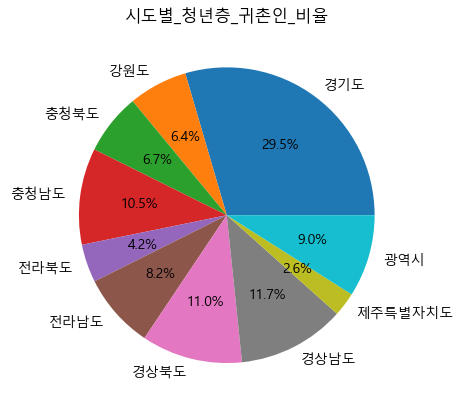

In [45]:
plt.pie(total_home_sum[5:]['합계'], labels=total_home_sum[5:]['구별'],
        autopct='%1.1f%%',
       )
plt.title('시도별_청년층_귀촌인_비율')
plt.show()

#### 2022년도 귀농인구 큰폭으로 감소에 대한 이유
- 국내 이동자수의 최저치 기록
- 귀농 / 귀촌 1인가구비율이 증가하면서 가구원수가 감소함
- 코로나 장기화로 인한 서비스업 중심의 도심지 경기 회복으로 인한 감소

#### 결론에 대한 세분화 분석
- 제일 많은 도와 제일 적은 도를 비교 간의 정책 비교
    - 귀농 -> 전라남도 / 충청북도
    - 귀촌 -> 경상남도 / 전라북도

#### 전라남도 지원정책
- 신규농업인 영농기초기술교육(시군)
- 신규농업인 현장실습교육(시군)
- 농업마이스터를 활용한 청년농업인 컨설팅 지원
- 스마트팜 청년창업 보육사업
- 대학생 농산업 체험캠프 운영
- 귀농귀촌 유치지원사업
- 청년후계농 영농정착 지원사업
- 후계농업경영인 육성
- 학사농업인 육성
- 청년 창업농장 조성
- 영농승계 청년농 창업지원
- 스마트팜 혁신밸리 임대형 스마트팜 운영
- 귀농 농업창업 및 주택구입 지원사업

#### 충청북도 지원정책
- 귀농 농업창업 및 주택구입 융자 지원
- 신규농업인 영농 기초기술교육
- 신규농업인 현장실습교육 지원
- 농업경영컨설팅 지원
- 귀농창업 활성화 지원
- 귀농귀촌인과 지역주민 융화교육 지원
- 귀농인의 집

#### 경상남도 귀촌 정책
- 귀농귀촌인 설계비 지원사업
- 경영실습임대농장
- 신규농업인 현장실습교육
- 귀농세대 지원
- 귀농 창업 활성화 지원
- 농촌대학 교육
- 청년농업인 취농직불제
- 청년후계농 영농정착 지원
- 차세대농업인 성공모델 육성 지원
- 농업인 농작업 편의장비 지원사업

#### 전라북도 귀촌 정책
- 귀농 창업자금 융자 지원
- 귀농인의 주택 신축·구입 융자 지원
- 청년 창업농 영농정착 지원